In [24]:
from langgraph.graph import StateGraph, START, END
from dotenv import load_dotenv
from typing import TypedDict, Literal

In [25]:
load_dotenv()

True

In [26]:
class QuadState(TypedDict):
    a:int
    b:int
    c:int
    
    equation:str
    discriminant:float
    result:str

In [31]:
def show_equation(state: QuadState):
    equation=f'{state["a"]}x2{state["b"]}x{state["c"]}'
    
    return {'equation':equation}


def calculate_discriminant(state: QuadState):
    discriminant= state["b"]**2 - (4*state["a"]*state["c"])
    
    return {"discriminant":discriminant}


def real_roots(state:QuadState):
    root1=(-state["b"] + state["discriminant"]**0.5)/(2*state["a"])
    root2=(-state["b"] - state["discriminant"]**0.5)/(2*state["a"])
    
    result = f'The roots are {root1} and {root2}'
    
    return {'result':result}


def repated_roots(state:QuadState):
    root=(-state["b"]) /(2*state["a"])
    
    result = f'Only repeating root is {root}'
    
    return {'result':result}


def no_real_roots(state:QuadState):
    
    result = f'No real roots'
    
    return {'result':result}


def check_condition(state:QuadState)->Literal["real_roots","repated_roots","no_real_roots"]:
    if state["discriminant"] > 0:
        return "real_roots"
    elif state["discriminant"] ==0:
        return "repated_roots"
    else:
        return "no_real_roots"

In [32]:
graph = StateGraph(QuadState)
graph.add_node("show_equation",show_equation)
graph.add_node("calculate_discriminant",calculate_discriminant)
graph.add_node("real_roots",real_roots)
graph.add_node("repated_roots",repated_roots)
graph.add_node("no_real_roots",no_real_roots)

graph.add_edge(START,"show_equation")
graph.add_edge("show_equation","calculate_discriminant")
graph.add_conditional_edges("calculate_discriminant",check_condition)
graph.add_edge("real_roots",END)
graph.add_edge("repated_roots",END)
graph.add_edge("no_real_roots",END)

workflow=graph.compile()

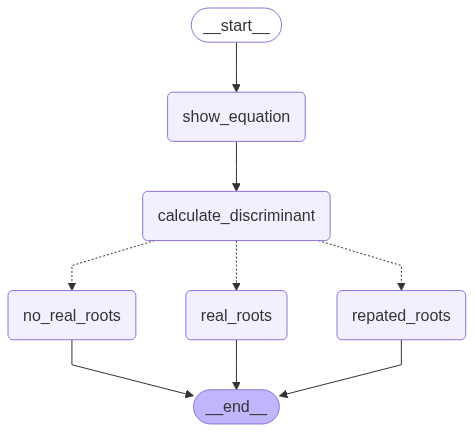

In [33]:
workflow

In [36]:
initial_state={
    'a':2,
    'b':4,
    'c':2
}
workflow.invoke(initial_state)

{'a': 2,
 'b': 4,
 'c': 2,
 'equation': '2x24x2',
 'discriminant': 0,
 'result': 'Only repeating root is -1.0'}